In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import seaborn as sns
import scipy
import pylab

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from textblob import TextBlob

from sklearn import linear_model
from sklearn.feature_extraction.text import CountVectorizer

from collections import defaultdict

# This is importing a "future" python version 3 print function.
from __future__ import print_function
from __future__ import division

%matplotlib inline
sns.set()
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')
pylab.rcParams.update({'figure.autolayout': True})

/Users/Franklin/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [ ]:
file_dir = '/Volumes/1TB_BAY/yelp_dataset_challenge_academic_dataset/'

#r = pd.read_csv(file_dir + 'review_without_text_year.csv')
r = pd.read_csv(file_dir + 'review_with_text.csv')
b = pd.read_csv('yelp_business_with_neighborhood.csv')
s = pd.read_csv('static_stats.csv')
u = pd.read_csv(file_dir + 'yelp_academic_dataset_user.csv')
metrics = pd.read_csv(file_dir + 'label_review_metrics.csv')
review_stars = pd.read_csv(file_dir + 'yelp_academic_dataset_review.csv')

In [20]:
rt = pd.merge(r.head(10000), metrics, on = 'review_id', how = 'inner')
rt = pd.merge(rt, review_stars[['review_id','stars', 'business_id']], on ='review_id', how = 'inner')
rt = rt.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis = 1)

In [22]:
def WordCount(corpus, keywords):
    count = 0 #start the counter at 0
    for word in corpus.split(): #for each word in the corpus
        if word in keywords: #if the word is the keyword
            count = count + 1 #add one to the counter
    return count

def WordFreq(corpus, keywords):
    count = 0 #start the counter at 0
    for word in corpus.split(): #for each word in the corpus
        if word in keywords: #if the word is the keyword
            count = count + 1 #add one to the counter
    return count/len(corpus.split())

def Polarity(corpus):
    blob = TextBlob(unicode(corpus, 'utf-8'))
    return blob.sentiment.polarity

def Subjectivity(corpus):
    blob = TextBlob(unicode(corpus, 'utf-8'))
    return blob.sentiment.subjectivity

In [23]:
rt['polarity'] =  rt['text'].apply(Polarity)
rt['subjectivity'] = rt['text'].apply(Subjectivity)

In [54]:
rt

,review_id,text,words,sentences,ease,grade,dale_chall,stars,business_id,polarity,subjectivity,kw_count,kw_freq,kw
0,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",83,5,72.16,7.2,8.23,4,5UmKMjUEUNdYWqANhGckJw,0.170339,0.326587,0,0.0,['cozy']
1,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,23,2,68.77,6.4,8.99,5,5UmKMjUEUNdYWqANhGckJw,0.933333,0.916667,0,0.0,['cozy']
2,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,73,6,84.68,4.4,6.61,5,5UmKMjUEUNdYWqANhGckJw,0.255093,0.479630,0,0.0,['cozy']
3,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,74,12,90.77,2.1,6.28,5,UsFtqoBl7naz8AVUBZMjQQ,0.569643,0.578571,0,0.0,['cozy']
4,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,137,8,79.60,6.4,6.44,3,UsFtqoBl7naz8AVUBZMjQQ,0.082843,0.554035,0,0.0,['cozy']
5,7N9j5YbBHBW6qguE5DAeyA,Wing sauce is like water. Pretty much a lot of...,60,5,84.68,4.4,6.34,1,UsFtqoBl7naz8AVUBZMjQQ,0.262063,0.534683,0,0.0,['cozy']
6,mjCJR33jvUNt41iJCxDU_g,Cold cheap beer. Good bar food. Good service. ...,63,7,96.18,2.1,6.84,4,UsFtqoBl7naz8AVUBZMjQQ,0.409091,0.704545,0,0.0,['cozy']
7,Ieh3kfZ-5J9pLju4JiQDvQ,I highly recommend this place. The mechanics a...,19,2,70.80,5.6,8.24,5,3eu6MEFlq2Dg7bQh8QbdOg,0.170000,0.563333,0,0.0,['cozy']
8,PU28OoBSHpZLkYGCmNxlmg,"I am a big believer in first impressions, so w...",145,8,87.05,5.6,6.27,5,3eu6MEFlq2Dg7bQh8QbdOg,0.371680,0.601515,0,0.0,['cozy']
9,XsA6AojkWjOHA4FmuAb8XQ,Decent range somewhat close to the city. The ...,84,6,74.19,6.4,8.09,3,cE27W9VPgO88Qxe4ol6y_g,0.148056,0.620556,0,0.0,['cozy']


In [90]:
keyword = ['']

rt['kw_count'] =  rt['text'].apply(WordCount, args = (keyword,))
rt['kw_freq'] =  rt['text'].apply(WordFreq, args = (keyword,))
rt['kw'] = str(keyword)

In [91]:
fr = rt[rt['kw_count'] > 0] #just the reviews where one of the keywords was mentioned once.
print(len(fr))

12


(5, 12)

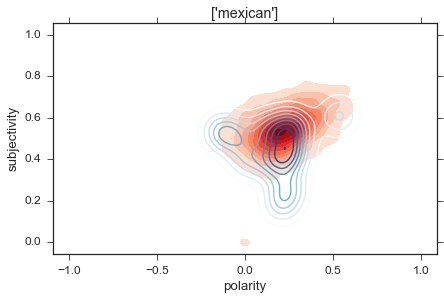

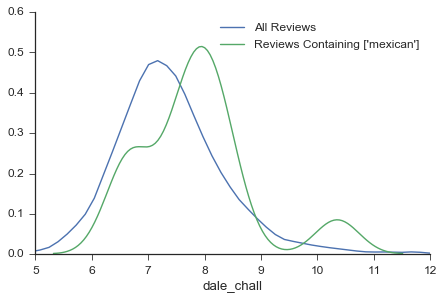

In [92]:
plt.figure()
plt.title(np.unique(fr['kw'])[0])
sns.kdeplot(rt['polarity'], rt['subjectivity'], shade = True, shade_lowest = False, cmap = 'Reds')
sns.kdeplot(fr['polarity'], fr['subjectivity'], cmap = 'Blues')

plt.figure()
sns.distplot(rt['dale_chall'], hist = False, label = 'All Reviews')
sns.distplot(fr['dale_chall'], hist = False, label = 'Reviews Containing ' + str(keyword))
sns.despine()
plt.legend()
plt.xlim(5,12)

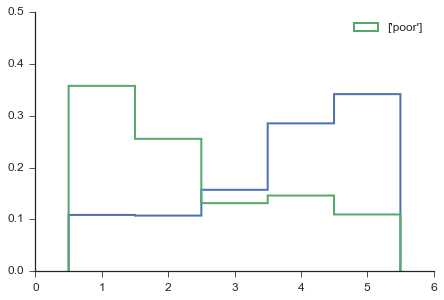

In [89]:
plt.hist(rt['stars'], range = [0.5,5.5], bins = 5, histtype = 'step', lw = 2, normed = True)
plt.hist(fr['stars'], range = [0.5,5.5], bins = 5, histtype = 'step', lw = 2, normed = True,\
        label = str(keyword))
plt.ylim(0,0.5)
plt.legend()
sns.despine()

In [59]:
rt

,review_id,text,words,sentences,ease,grade,dale_chall,stars,business_id,polarity,subjectivity,kw_count,kw_freq,kw
0,Ya85v4eqdd6k9Od8HbQjyA,"Mr Hoagie is an institution. Walking in, it do...",83,5,72.16,7.2,8.23,4,5UmKMjUEUNdYWqANhGckJw,0.170339,0.326587,0,0.0,['rude']
1,KPvLNJ21_4wbYNctrOwWdQ,Excellent food. Superb customer service. I mis...,23,2,68.77,6.4,8.99,5,5UmKMjUEUNdYWqANhGckJw,0.933333,0.916667,0,0.0,['rude']
2,fFSoGV46Yxuwbr3fHNuZig,Yes this place is a little out dated and not o...,73,6,84.68,4.4,6.61,5,5UmKMjUEUNdYWqANhGckJw,0.255093,0.479630,0,0.0,['rude']
3,Di3exaUCFNw1V4kSNW5pgA,All the food is great here. But the best thing...,74,12,90.77,2.1,6.28,5,UsFtqoBl7naz8AVUBZMjQQ,0.569643,0.578571,0,0.0,['rude']
4,0Lua2-PbqEQMjD9r89-asw,We checked this place out this past Monday for...,137,8,79.60,6.4,6.44,3,UsFtqoBl7naz8AVUBZMjQQ,0.082843,0.554035,0,0.0,['rude']
5,7N9j5YbBHBW6qguE5DAeyA,Wing sauce is like water. Pretty much a lot of...,60,5,84.68,4.4,6.34,1,UsFtqoBl7naz8AVUBZMjQQ,0.262063,0.534683,0,0.0,['rude']
6,mjCJR33jvUNt41iJCxDU_g,Cold cheap beer. Good bar food. Good service. ...,63,7,96.18,2.1,6.84,4,UsFtqoBl7naz8AVUBZMjQQ,0.409091,0.704545,0,0.0,['rude']
7,Ieh3kfZ-5J9pLju4JiQDvQ,I highly recommend this place. The mechanics a...,19,2,70.80,5.6,8.24,5,3eu6MEFlq2Dg7bQh8QbdOg,0.170000,0.563333,0,0.0,['rude']
8,PU28OoBSHpZLkYGCmNxlmg,"I am a big believer in first impressions, so w...",145,8,87.05,5.6,6.27,5,3eu6MEFlq2Dg7bQh8QbdOg,0.371680,0.601515,0,0.0,['rude']
9,XsA6AojkWjOHA4FmuAb8XQ,Decent range somewhat close to the city. The ...,84,6,74.19,6.4,8.09,3,cE27W9VPgO88Qxe4ol6y_g,0.148056,0.620556,0,0.0,['rude']
